In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 실제 데이터 모델링

### 이진분류

In [24]:
# step 1 : 데이터 수집

X, y = make_classification(n_samples=300,
                           n_features=2,
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1,
                           random_state=33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape)
print(X_test.shape)

torch.Size([210, 2])
torch.Size([90, 2])


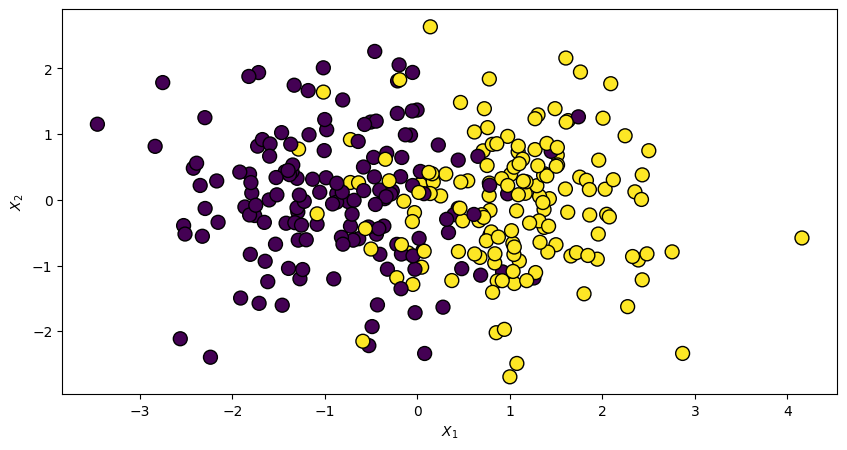

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolors='k')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [26]:
# step 2 : 모델 만들기

class simpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2,10)
        self.l2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.sigmoid(self.l1(x))
        x = F.sigmoid(self.l2(x))
        return x
model = simpleNN()
print(model)

simpleNN(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=1, bias=True)
)


In [27]:
lr = 1e-1
loss_fn = nn.BCELoss()
opt = torch.optim.SGD(model.parameters(), lr=lr)

epochs = 100
batch_size = 210

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

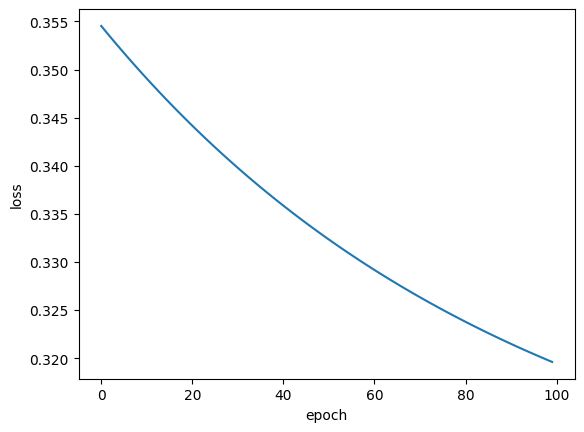

In [32]:
losses = []

for epoch in range(epochs):
    for batch in dataloader:
        batch_X, batch_y = batch[0].to(device), batch[1].to(device)
        preds = model(batch_X).squeeze()
        loss = loss_fn(preds, batch_y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    losses.append(loss.item())

plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [37]:
# step 4 모델 데스트

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze()
    y_pred_test = (y_pred_test >= 0.5).float()
    accuracy = (y_pred_test.eq(y_test).sum() / y_test.size(0)).item()
print("test acc", accuracy)

test acc 0.7777777910232544


In [36]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 14.2 MB/s eta 0:00:00


In [38]:
from torchmetrics import Accuracy

acc_metric = Accuracy(task='binary')

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze()
    y_pred_test = (y_pred_test >= 0.5).float()

    acc = acc_metric(y_pred_test, y_test)

print("acc : ", acc.item())

acc :  0.7777777910232544


## 다중분류

In [39]:
# 데이터 생성
X, y = make_classification(n_samples=900, n_features=5, n_redundant=0,
                           n_informative=3, n_clusters_per_class=2, n_classes=3,
                           random_state=33)

# 데이터 분할: train, validation, test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, shuffle=True, random_state=42)

In [40]:
# 데이터를 Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [41]:
y_test

tensor([2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2,
        1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1,
        2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2,
        1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
        2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1,
        1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1,
        1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0])

In [42]:
# 모델 정의
class MultiClassNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(5, 100)
        self.l2 = nn.Linear(100, 50)
        self.l3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        X = self.l3(x)                                  # Logits 변환
        return x

In [54]:
model = MultiClassNN().to(device)
print(model)

MultiClassNN(
  (l1): Linear(in_features=5, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=50, bias=True)
  (l3): Linear(in_features=50, out_features=3, bias=True)
)


In [55]:
# 손실 함수와 옵티마이저
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
# 데이터셋 + 데이터 로더
epoch = 50
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

losses = []
val_losses = []

# 학습 루프
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        X, y = batch[0].to(device), batch[1].to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    losses.append(loss.item())

# 검증 손실 계산
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for val_batch in val_dataloader:
            val_X, val_y = val_batch[0].to(device), val_batch[1].to(device)
            val_preds = model(val_X)
            val_loss += loss_fn(val_preds, val_y).item()
        val_losses.append(val_loss / len(val_dataloader))

In [60]:
print(len(val_dataloader))

6


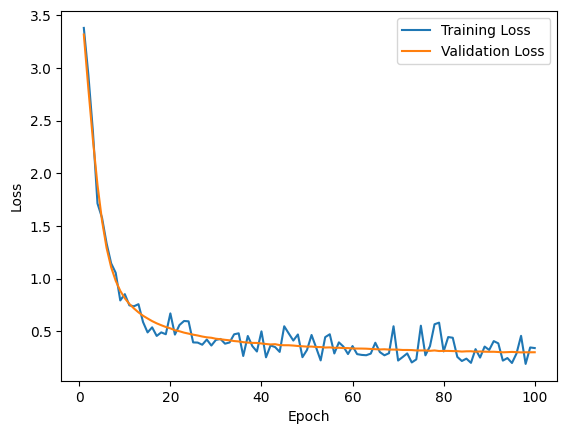

In [57]:
# 학습 및 검증 손실 시각화

plt.plot(range(1, epochs + 1), losses, label="Training Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [59]:
# 모델 평과

with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)
    accuracy = (y_pred_labels == y_test).sum().item() / y_test.size(0)

print("Test Accuracy : ", accuracy)

Test Accuracy :  0.8888888888888888
